In [1]:
import pandas as pd
import numpy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import time
from datetime import datetime 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

start_time = datetime.now() 

In [2]:
test = pd.read_csv("C:\\MyFoulder\\SCE\שנה ג\\סמסטר ב\\מבוא ללמידה עמוקה\\4\\test_ex4_dl2021b.csv")
train = pd.read_csv("C:\\MyFoulder\\SCE\שנה ג\\סמסטר ב\\מבוא ללמידה עמוקה\\4\\training_ex4_dl2021b.csv")
train

,id,sentence,label
0,1,a superlens is able to beat the diffraction li...,0
1,2,in the sociology of religion a sect is genera...,1
2,3,it is approximately enclosed by the river seve...,0
3,4,"in western medieval legend, a succubus (plural...",1
4,5,"kids, which was originally launched in 2002 as...",0
...,...,...,...
3295,3296,"as the thinker, he was defeated by the origina...",0
3296,3297,"in biology , an organism is an individual livi...",1
3297,3298,"in computer performance testing , khornerstone...",1
3298,3299,"the following summer, back in the united state...",0


In [3]:
test

,id,sentence
0,3300,a relay is an electrical switch that opens and...
1,3301,kv27 .
2,3302,"a breviary (from latin brevis, 'short' or 'con..."
3,3303,"however, the upper jurassic rocks are availabl..."
4,3304,the first philip k. dick award was presented a...
...,...,...
1415,4715,"any damane who disagrees (usually, damane who ..."
1416,4716,the dasyproctidae are a family of large south ...
1417,4717,ev refers to a species of pokémon.
1418,4718,"in kumher, 19% of the population is under 6 ye..."


In [4]:
train['sentence'] = train['sentence'].str.replace('[^\w\s]','')
train['sentence'] = train['sentence'].str.replace('[^a-zA-z ]','')

test['sentence'] = test['sentence'].str.replace('[^\w\s]','')
test['sentence'] = test['sentence'].str.replace('[^a-zA-z ]','')


stop_words = set(stopwords.words('english'))

for ID in  range(len(train['sentence'])):
    querywords = train['sentence'][ID].split()
    resultwords  = [word for word in querywords if word not in stop_words]
    train['sentence'][ID] = ' '.join(resultwords)
    
for ID in  range(len(test['sentence'])):
    querywords = test['sentence'][ID].split()
    resultwords  = [word for word in querywords if word not in stop_words]
    test['sentence'][ID] = ' '.join(resultwords)

<ipython-input-4-33f48ffda2c0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sentence'][ID] = ' '.join(resultwords)
<ipython-input-4-33f48ffda2c0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentence'][ID] = ' '.join(resultwords)


In [5]:
train

,id,sentence,label
0,1,superlens able beat diffraction limit,0
1,2,sociology religion sect generally small religi...,1
2,3,approximately enclosed river severn north ches...,0
3,4,western medieval legend succubus plural succub...,1
4,5,kids originally launched martha stewart kids s...,0
...,...,...,...
3295,3296,thinker defeated original flash soon became re...,0
3296,3297,biology organism individual living system anim...,1
3297,3298,computer performance testing khornerstone mult...,1
3298,3299,following summer back united states wiener dec...,0


In [6]:
test

,id,sentence
0,3300,relay electrical switch opens closes control a...
1,3301,kv
2,3302,breviary latin brevis short concise liturgical...
3,3303,however upper jurassic rocks available supply ...
4,3304,first philip k dick award presented norwescon ...
...,...,...
1415,4715,damane disagrees usually damane brought seanch...
1416,4716,dasyproctidae family large south american rode...
1417,4717,ev refers species pokmon
1418,4718,kumher population years age


In [7]:
train.isnull().sum()

id          0
sentence    0
label       0
dtype: int64

In [8]:
test.isnull().sum()

id          0
sentence    0
dtype: int64

In [9]:
train.dropna(subset = ['sentence'], inplace=True)
test.dropna(subset = ['sentence'], inplace=True)

In [10]:
X = train.drop(['id', 'label'], axis=1)
X

,sentence
0,superlens able beat diffraction limit
1,sociology religion sect generally small religi...
2,approximately enclosed river severn north ches...
3,western medieval legend succubus plural succub...
4,kids originally launched martha stewart kids s...
...,...
3295,thinker defeated original flash soon became re...
3296,biology organism individual living system anim...
3297,computer performance testing khornerstone mult...
3298,following summer back united states wiener dec...


In [11]:
y = train['label']
y

0       0
1       1
2       0
3       1
4       0
       ..
3295    0
3296    1
3297    1
3298    0
3299    1
Name: label, Length: 3300, dtype: int64

In [12]:
j = 0
for i in range(len(y)):
    if y[i]==1:
        j+=1
print('Num of 1\'s is: ', j)

Num of 1's is:  1341


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train
#X_test
#y_train
#y_test

,sentence
418,republic state country led hereditary monarch ...
1821,jehoshaphat jehosaphat josaphat yehoshafat heb...
3078,morelia spilota variegata subspecies python fo...
2075,confidant character common romantic comedy fil...
2704,lcuma exported around world
...,...
1043,henley stated notes written booklet eagles bes...
958,adenanthos species widely distributed througho...
2135,many fans also believe lienda involved point d...
2439,firewire also known link ieee personal compute...


In [15]:
# y_trains = []
# y_tests = []
# for t in range(len(y_train)):
#     y_trains.append(int(0))
# for t in range(len(y_test)):
#     y_tests.append(int(0))

In [16]:
#y_trains

In [17]:
#y_tests

In [18]:
# from sklearn.utils import shuffle
# X_train, y_trains = shuffle(X_train, y_trains)
# X_test, y_tesst = shuffle(X_test, y_tests)

In [19]:
sentences = [w.split() for w in X_test['sentence']]
print(len(sentences))
model = Word2Vec(sentences, min_count=1, vector_size=300)
print(model)

words = list(model.wv.index_to_key)
len(words)

temp = []

for s in X_test['sentence'].tolist():
    temp.append(len(s.split()))

zer = numpy.array([0.0 for x in range(300)])

sen = list(X_test['sentence'])
vecs = []
vecs2 = []
for s in sen:
    if len(s.split())<40:
        for w in s.split():
            vecs.append(numpy.array(model.wv.get_vector(w, norm=True)))
        if len(s.split()) == 0:
            vecs.append(zer)
        vecs2.append(numpy.array(vecs))
        vecs.clear()
    else:
        vecs2.append(numpy.array([zer for x in range(40)]))
    
for i in range(len(vecs2)):
    while len(vecs2[i])<40:
        vecs2[i] = numpy.vstack([vecs2[i], zer])

X_test_vecs = vecs2

660
Word2Vec(vocab=4997, vector_size=300, alpha=0.025)


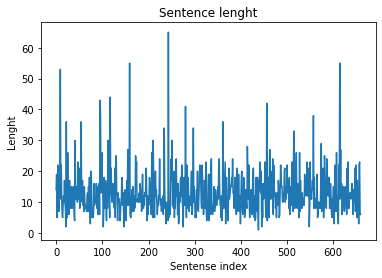

In [20]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(range(0,len(temp)), temp)                                             
plt.xlabel('Sentense index')
plt.ylabel('Lenght')
plt.xticks()
plt.title('Sentence lenght')
plt.yticks()
plt.style.use('default')
plt.show()

In [21]:
numpy.array(X_test_vecs).shape

(660, 40, 300)

In [22]:
sentences = [w.split() for w in X_train['sentence']]
print(len(sentences))
model = Word2Vec(sentences, min_count=1, vector_size=300)
print(model)

words = list(model.wv.index_to_key)
len(words)

temp2 = []

for s in X_test['sentence'].tolist():
    temp2.append(len(s.split()))

zer = numpy.array([0.0 for x in range(300)])

sen = list(X_train['sentence'])
vecs = []
vecs2 = []
for s in sen:
    if len(s.split())<40:
        for w in s.split():
            vecs.append(numpy.array(model.wv.get_vector(w, norm=True)))
        if len(s.split()) == 0:
            vecs.append(zer)
        vecs2.append(numpy.array(vecs))
        vecs.clear()
    else:
        vecs2.append(numpy.array([zer for x in range(40)]))
    
for i in range(len(vecs2)):
    while len(vecs2[i])<40:
        vecs2[i] = numpy.vstack([vecs2[i], zer])

X_train_vecs = vecs2

2640
Word2Vec(vocab=13747, vector_size=300, alpha=0.025)


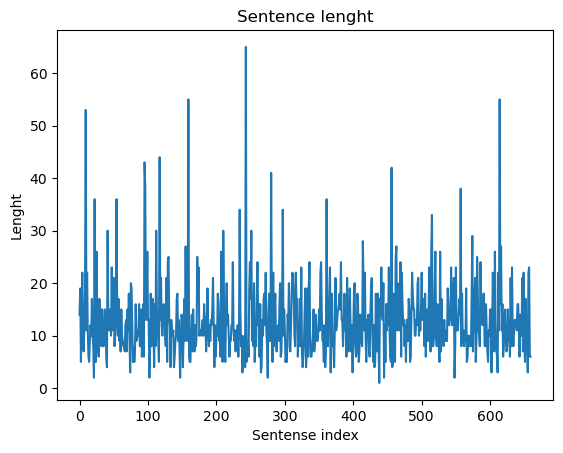

In [23]:
plt.plot(range(0,len(temp2)), temp2)                                             
plt.xlabel('Sentense index')
plt.ylabel('Lenght')
plt.xticks()
plt.title('Sentence lenght')
plt.yticks()
plt.style.use('default')
plt.show()

In [24]:
numpy.array(vecs2).shape

(2640, 40, 300)

In [25]:
# from sklearn.utils import shuffle
# X_train_vecs, y_train = shuffle(X_train_vecs, y_train)
# X_test_vecs, y_test = shuffle(X_test_vecs, y_test)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, GRU, Dropout, Bidirectional

In [27]:
model = Sequential()
#model.add(GRU(40, return_sequences=True, dropout=0.5,recurrent_dropout=0.5, input_shape=(40,300)))
#model.add(GRU(40, return_sequences=False, dropout=0.5,recurrent_dropout=0.5))

model.add(Bidirectional(LSTM(40, return_sequences=False, dropout=0.1,recurrent_dropout=0.1, input_shape=(40,300)))) ### !!!
#model.add((LSTM(40, return_sequences=False, dropout=0.1,recurrent_dropout=0.1))) #only last is false
#model.add(Dense(20,  activation=None))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

#model.fit(numpy.array(X_train_vecs), y_train, validation_data=(numpy.array(X_test_vecs), y_test), epochs=10) ###batch size???
model.fit(numpy.array(X_train_vecs), y_train, epochs=10, batch_size=10)

Epoch 1/10
264/264 [==============================] - 6s 14ms/step - loss: 0.6710 - accuracy: 0.5880
Epoch 2/10
264/264 [==============================] - 4s 14ms/step - loss: 0.5656 - accuracy: 0.7071
Epoch 3/10
264/264 [==============================] - 4s 14ms/step - loss: 0.5084 - accuracy: 0.7429
Epoch 4/10
264/264 [==============================] - 4s 14ms/step - loss: 0.4849 - accuracy: 0.7621
Epoch 5/10
264/264 [==============================] - 4s 14ms/step - loss: 0.4439 - accuracy: 0.7907
Epoch 6/10
264/264 [==============================] - 4s 14ms/step - loss: 0.3727 - accuracy: 0.8277
Epoch 7/10
264/264 [==============================] - 4s 14ms/step - loss: 0.3722 - accuracy: 0.8412
Epoch 8/10
264/264 [==============================] - 4s 14ms/step - loss: 0.3432 - accuracy: 0.8513
Epoch 9/10
264/264 [==============================] - 4s 14ms/step - loss: 0.3272 - accuracy: 0.8639
Epoch 10/10
264/264 [==============================] - 4s 14ms/step - loss: 0.3131 - accura

In [28]:
model.summary()

loss, accuracy = model.evaluate(numpy.array(X_train_vecs), y_train, verbose=False)
print('Train Accuracy: ', accuracy)
loss, accuracy = model.evaluate(numpy.array(X_test_vecs), y_test, verbose=False)
print('Test Accuracy: ', accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (10, 80)                  109120    
_________________________________________________________________
dense (Dense)                (10, 1)                   81        
Total params: 109,201
Trainable params: 109,201
Non-trainable params: 0
_________________________________________________________________
Train Accuracy:  0.9098485112190247
Test Accuracy:  0.5409091114997864


In [29]:
sentences = [w.split() for w in test['sentence']]
print(len(sentences))
model2 = Word2Vec(sentences, min_count=1, vector_size=300)
print(model2)

words = list(model2.wv.index_to_key)
len(words)

zer = numpy.array([0.0 for x in range(300)])

sen = list(test['sentence'])
vecs = []
vecs2 = []
for s in sen:
    if len(s.split())<40:
        for w in s.split():
            vecs.append(numpy.array(model2.wv.get_vector(w, norm=True)))
        if len(s.split()) == 0:
            vecs.append(zer)
        vecs2.append(numpy.array(vecs))
        vecs.clear()
    else:
        vecs2.append(numpy.array([zer for x in range(40)]))
    
for i in range(len(vecs2)):
    while len(vecs2[i])<40:
        vecs2[i] = numpy.vstack([vecs2[i], zer])

f_vecs = vecs2


1420
Word2Vec(vocab=9021, vector_size=300, alpha=0.025)


In [30]:
test_pred = (model.predict_classes(numpy.array(f_vecs)) > 0.5).astype("int32")
test_pred

C:\Users\jenga\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [31]:
j = 0
for i in range(len(test_pred)):
    if test_pred[i]==1:
        j+=1
print(j)

299


In [32]:
df3 = pd.read_csv("C:\\MyFoulder\\SCE\שנה ג\\סמסטר ב\\מבוא ללמידה עמוקה\\4\\sampleSubmission.csv")
df3['label'] = test_pred

df3.to_csv('Project4.14.csv', index = False)

In [33]:
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

Time elapsed in (hh:mm:ss.ms): "0:00:44.149491"
